# Introduction by Example

> [PyTorch geometric](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#learning-methods-on-graphs)의 튜토리얼을 구현한 jupyter notebook 입니다.

![](./images/pytorch_geometric.png)

## 01. Data Handling of Graphs

A graph is used to model pairwise relations (edges) between objects (nodes). A single graph in PyTorch Geometric is described by an instance of [`torch_geometric.data.Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data), which holds the following attributes by default:

- `data.x`: Node feature matrix with shape `[num_nodes, num_node_features]`
- `data.edge_index`: Graph connectivity in COO format with shape `[2, num_edges]` and type `torch.long`
- `data.edge_attr`: Edge feature matrix with shape `[num_edges, num_edge_features]`
- `data.y`: Target to train against (may have arbitrary shape), *e.g.*, node-level targets of shape `[num_nodes, *]` or graph-level targets of shape `[1, *]`
- `data.pos`: Node position matrix with shape `[num_nodes, num_dimensions]`

> **COO(COOrdinate) format** [link 참고](https://matteding.github.io/2019/04/25/sparse-matrices/)
> - The savings on memory consumption is quite substantial as the matrix size increases.

<img src="./images/coo.gif" height="50%" width="50%"/>

In [14]:
import torch
from torch_geometric.data import Data


edge_index = torch.tensor([[0, 1, 1, 2, 0, 2], 
                           [1, 0, 2, 1, 2, 0]], dtype=torch.long)

x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [15]:
data

Data(edge_index=[2, 6], x=[3, 1])

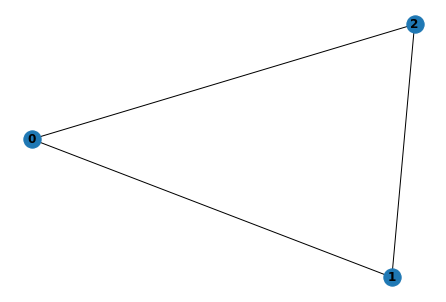

In [16]:
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx


G = to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True, font_weight='bold')

In [17]:
# edge_index를 tuple로 사용하여 graph data 만들기

edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1],
                           [0, 2],
                           [2, 0]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())

data

Data(edge_index=[2, 6], x=[3, 1])

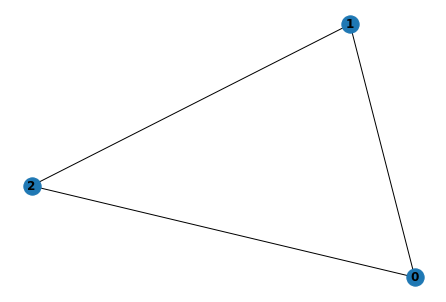

In [18]:
G = to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True, font_weight='bold')

#### `torch_geometric.data.Data` provides a number of utility functions, e.g.:

In [19]:
print(data.keys)

['x', 'edge_index']


In [20]:
print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [21]:
for key, item in data:
    print(f'{key} found in data')

edge_index found in data
x found in data


In [22]:
'edge_attr' in data

False

In [23]:
data.num_nodes

3

In [24]:
data.num_edges

6

In [25]:
data.num_node_features

1

In [26]:
data.contains_isolated_nodes()

False

In [27]:
data.contains_self_loops()

False

In [28]:
data.is_directed()

False

In [29]:
# Transfer data object to GPU.
device = torch.device('cuda')
data = data.to(device)